# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [32]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute X^T * X (Gram matrix)
    X_train_T_X_train = X_train.T @ X_train

    # Step 2: Use np.linalg.eigh instead of np.linalg.eig to ensure real eigenvalues (since the matrix is symmetric)
    eigvals_V, eigvecs_V = np.linalg.eigh(X_train_T_X_train)

    # Step 3: Sort the eigenvectors by the largest eigenvalues
    idx = np.argsort(eigvals_V)[::-1]
    eigvals_V = eigvals_V[idx]
    eigvecs_V = eigvecs_V[:, idx]

    # Step 4: Select the top n_components eigenvectors (V matrix)
    V = eigvecs_V[:, :n_components]

    # Step 5: Compute the singular values as the square roots of the eigenvalues (take only real part)
    singular_values = np.sqrt(np.real(eigvals_V[:n_components]))

    # Step 6: Compute the U matrix as (X * V) / singular_values
    U = (X_train @ V) / singular_values

    # Step 7: Project the training and test data onto the selected components
    X_train_proj = U @ np.diag(singular_values)
    X_test_proj = X_test @ V

    return X_train_proj, X_test_proj


## Part 3: Train Logistic Regression and Measure Performance

In [33]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [34]:
svd_components = [1, 5, 10, 20, 50, 100, 200]  # List of SVD components to experiment with

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 1 components...
SVD components: 1, Accuracy: 0.1988, Training time: 0.3133 seconds
Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6659, Training time: 0.4294 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8020, Training time: 0.6756 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 1.0169 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 10.2474 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 39.5641 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 107.9715 seconds


In [ ]:
# print(f"Applying custom SVD with {784} components...")

# # Apply SVD to the training and test sets
# X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, 784)

# # Train the logistic regression model and get accuracy and training time
# accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

# # Store the results
# results.append((784, accuracy, training_time))
    
# print(f"SVD components: {784}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# 0.9209 accuracy in 10 minutes

In [36]:
n_components, accuracies, training_times = zip(*results)

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


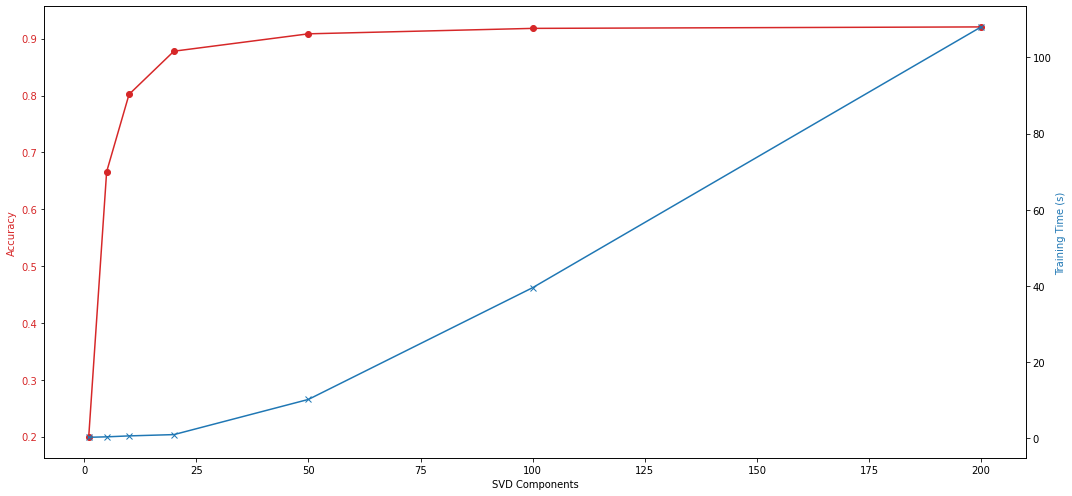

In [37]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
# plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors.
# Plot the results
fig, ax1 = plt.subplots()
# make plot bigger
fig.set_size_inches(15, 7)

color = 'tab:red'
ax1.set_xlabel('SVD Components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_components, accuracies, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Training Time (s)', color=color)
ax2.plot(n_components, training_times, color=color, marker='x')

fig.tight_layout()
plt.show()


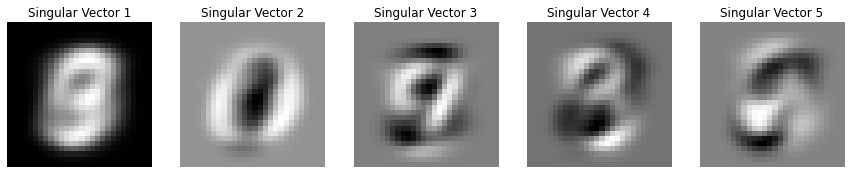

In [38]:
# Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
# Visualize the top 5 singular vectors
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
top_sv = Vt[:5]

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, sv in enumerate(top_sv):
    ax = axes[i]
    ax.imshow(sv.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Singular Vector {i+1}")

plt.show()



## Part 6: Analyze / Conclusion 

Depending on the use case, it seems like 100 components is a good trade-off between accuracy and training time. The accuracy is close to the original data, and the training time is significantly reduced. The top 5 singular vectors show the most important features of the data, which can be used for visualization or feature extraction. SVD is a powerful technique for dimensionality reduction and can be used to preprocess data for machine learning models effectively.